In [1]:
import numpy as np
import pandas as pd


In [2]:

AMZN = pd.read_csv('AMZN.csv')
AMZN['Company'] = 'AMZN'
BTCUSD = pd.read_csv('BTC-USD.csv')
BTCUSD['Company'] = 'BTCUSD'
DPZ = pd.read_csv('DPZ.csv')
DPZ['Company'] = 'DPZ'
NFLX = pd.read_csv('NFLX.csv')
NFLX['Company'] = 'NFLX'

stocks_list = [AMZN, BTCUSD, DPZ, NFLX]


In [3]:
df = pd.concat([AMZN, NFLX, BTCUSD, DPZ], axis =0)
tech_list = ['AMZN', 'BTCUSD', 'NFLX', 'DPZ']


In [4]:
BTCUSD

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2022-09-02,20126.072266,20401.568359,19814.765625,19969.771484,19969.771484,29123998928,BTCUSD
1,2022-09-03,19969.718750,20037.009766,19698.355469,19832.087891,19832.087891,23613051457,BTCUSD
2,2022-09-04,19832.470703,19999.689453,19636.816406,19986.712891,19986.712891,25245861652,BTCUSD
3,2022-09-05,19988.789063,20031.160156,19673.046875,19812.371094,19812.371094,28813460025,BTCUSD
4,2022-09-06,19817.724609,20155.269531,18800.171875,18837.667969,18837.667969,43403978910,BTCUSD
...,...,...,...,...,...,...,...,...
361,2023-08-29,26102.486328,28089.337891,25912.628906,27727.392578,27727.392578,29368391712,BTCUSD
362,2023-08-30,27726.083984,27760.160156,27069.207031,27297.265625,27297.265625,16343655235,BTCUSD
363,2023-08-31,27301.929688,27456.078125,25752.929688,25931.472656,25931.472656,20181001451,BTCUSD
364,2023-09-01,25934.021484,26125.869141,25362.609375,25800.724609,25800.724609,17202862221,BTCUSD


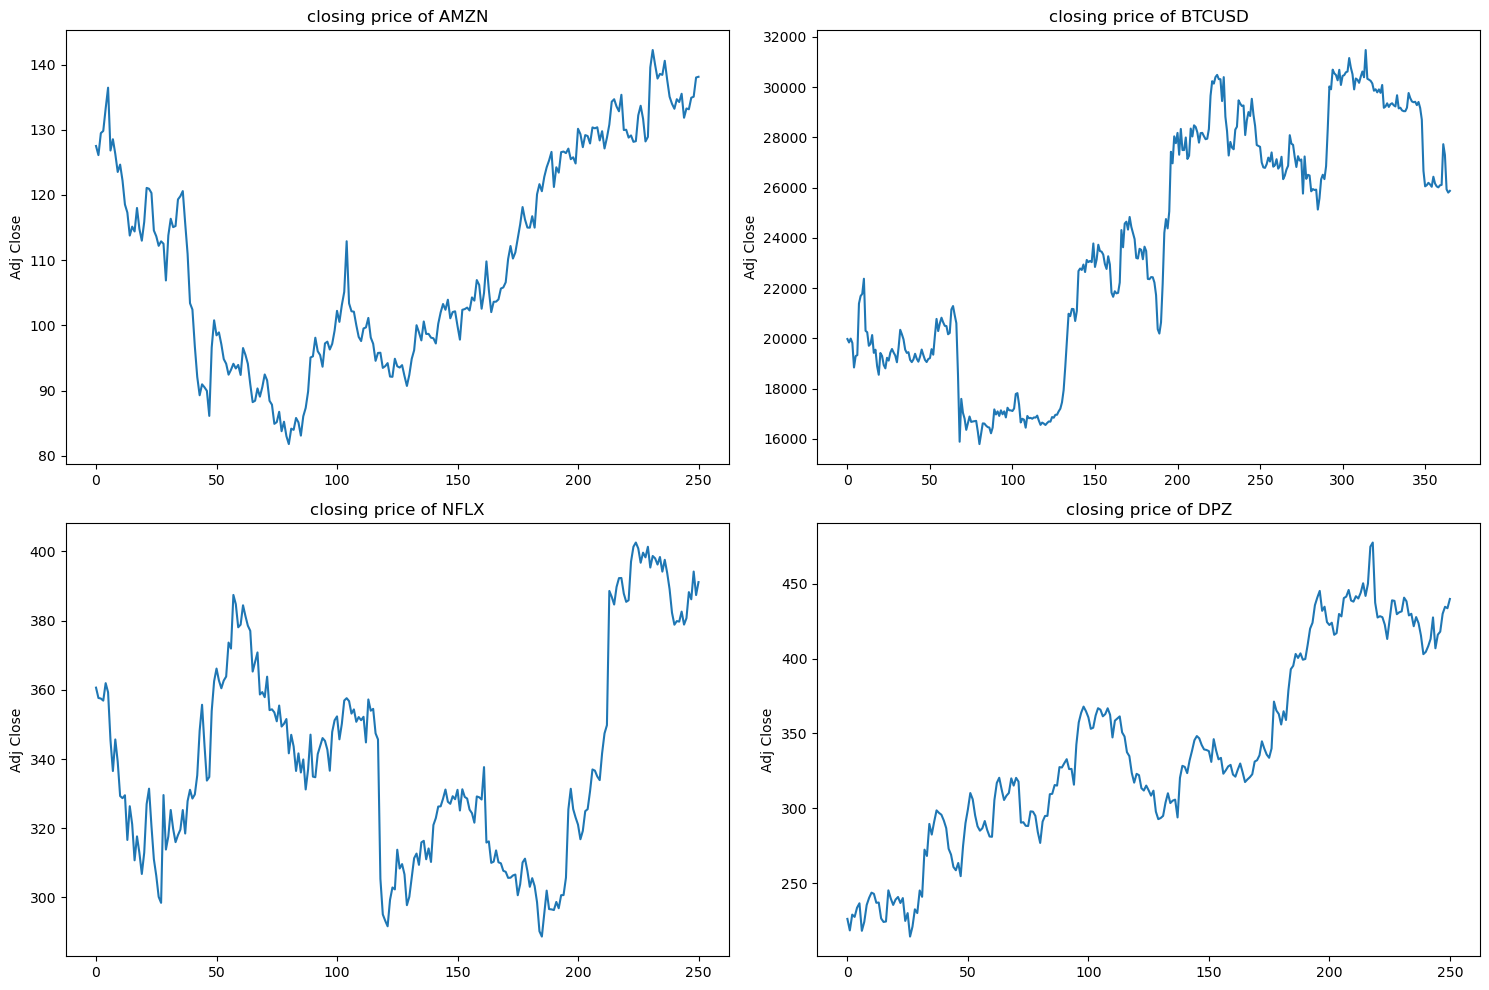

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.subplots_adjust(top=2.25,bottom = 1.2)

for i, stock in enumerate(stocks_list,1):
    plt.subplot(2,2,i)
    plt.plot(stock['Adj Close'])
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"closing price of {tech_list[i-1]}")
    
plt.tight_layout()

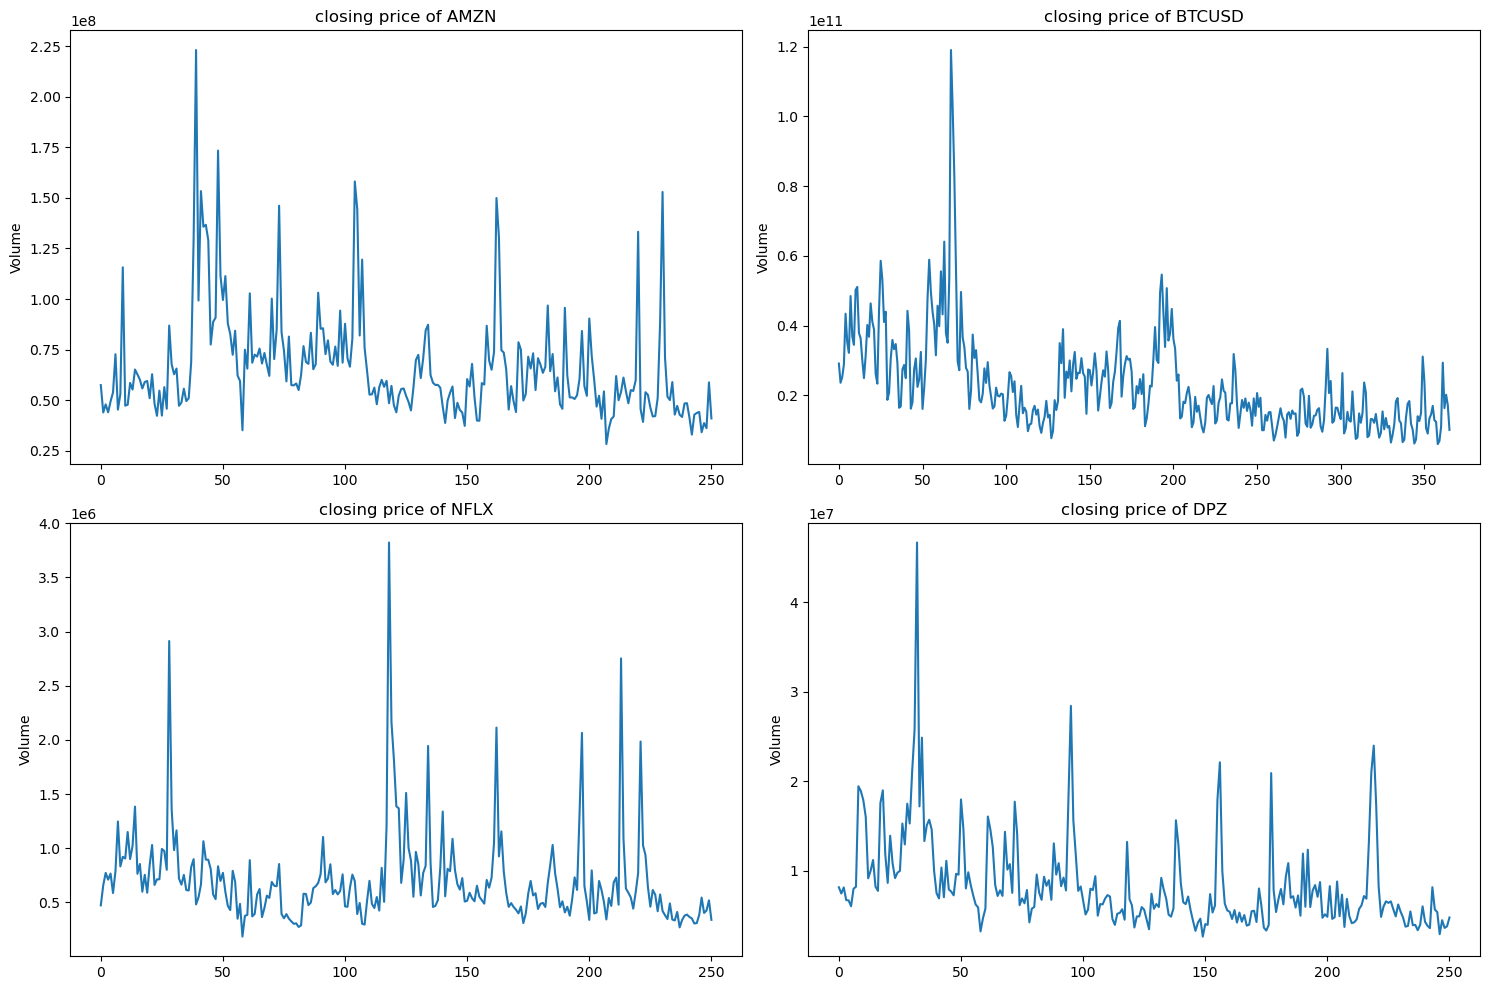

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.subplots_adjust(top=2.25,bottom = 1.2)

for i, stock in enumerate(stocks_list,1):
    plt.subplot(2,2,i)
    plt.plot(stock['Volume'])
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"closing price of {tech_list[i-1]}")
    
plt.tight_layout()

Text(0.5, 1.0, 'DPZ')

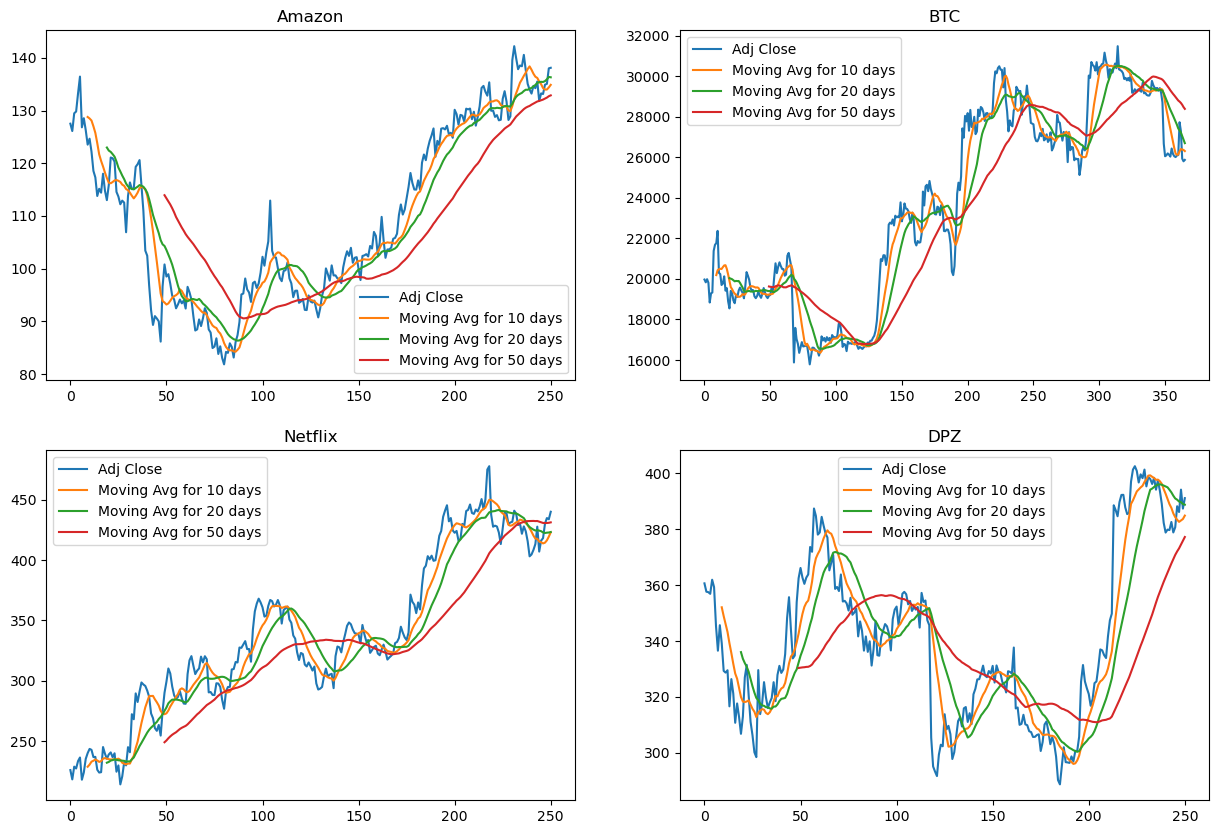

In [7]:
#calculating moving average for the stocks

moving_averages = [10,20,50]

for ma in moving_averages:
    for stock in stocks_list:
        column_name = f"Moving Avg for {ma} days"
        stock[column_name] = stock['Adj Close'].rolling(ma).mean()

fig,axes  = plt.subplots(nrows=2,ncols =2)
fig.set_figheight(10)
fig.set_figwidth(15)


AMZN[['Adj Close', 'Moving Avg for 10 days', 'Moving Avg for 20 days', 'Moving Avg for 50 days']].plot(ax= axes[0,0])
axes[0,0].set_title('Amazon')

BTCUSD[['Adj Close', 'Moving Avg for 10 days', 'Moving Avg for 20 days', 'Moving Avg for 50 days']].plot(ax= axes[0,1])
axes[0,1].set_title('BTC')

NFLX[['Adj Close', 'Moving Avg for 10 days', 'Moving Avg for 20 days', 'Moving Avg for 50 days']].plot(ax= axes[1,0])
axes[1,0].set_title('Netflix')

DPZ[['Adj Close', 'Moving Avg for 10 days', 'Moving Avg for 20 days', 'Moving Avg for 50 days']].plot(ax= axes[1,1])
axes[1,1].set_title('DPZ')


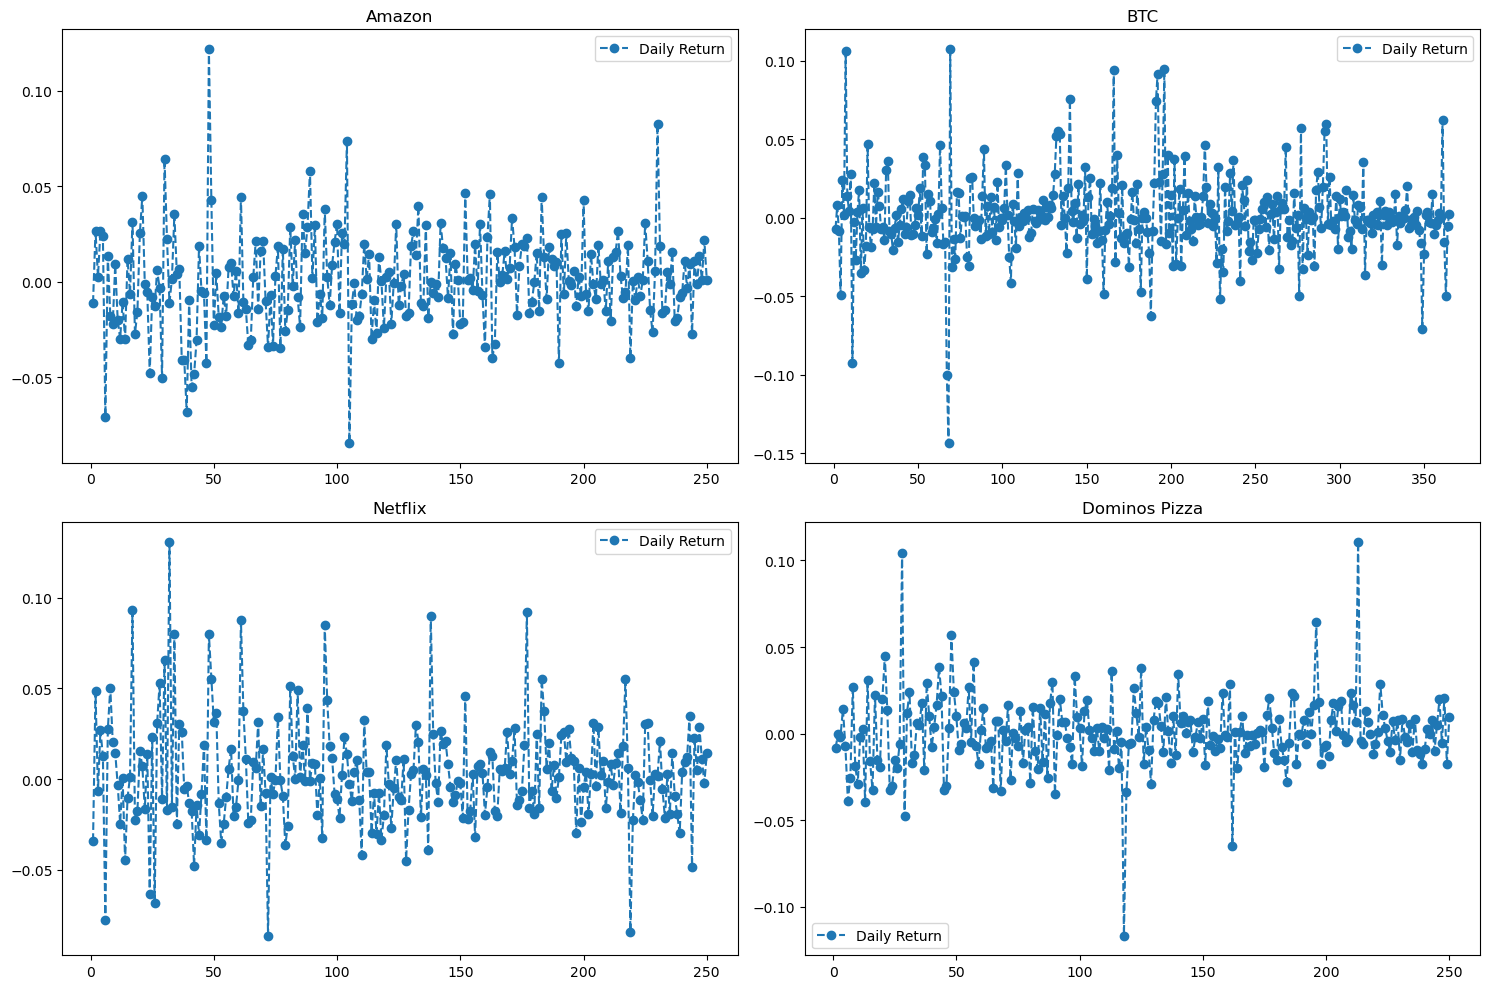

In [8]:
#Volatality of the stocks to calculate the Risk

for stock in stocks_list:
    stock['Daily Return'] = stock['Adj Close'].pct_change()


fig,axes  = plt.subplots(nrows=2,ncols =2)
fig.set_figheight(10)
fig.set_figwidth(15)

AMZN[['Daily Return']].plot(ax = axes[0,0], legend = True, marker = 'o',linestyle = '--')
axes[0,0].set_title('Amazon')

BTCUSD[['Daily Return']].plot(ax = axes[0,1], legend = True, marker = 'o',linestyle = '--')
axes[0,1].set_title('BTC')
NFLX[['Daily Return']].plot(ax = axes[1,0], legend = True, marker = 'o',linestyle = '--')
axes[1,0].set_title('Netflix')
DPZ[['Daily Return']].plot(ax = axes[1,1], legend = True, marker = 'o',linestyle = '--')
axes[1,1].set_title('Dominos Pizza')

fig.tight_layout()
    

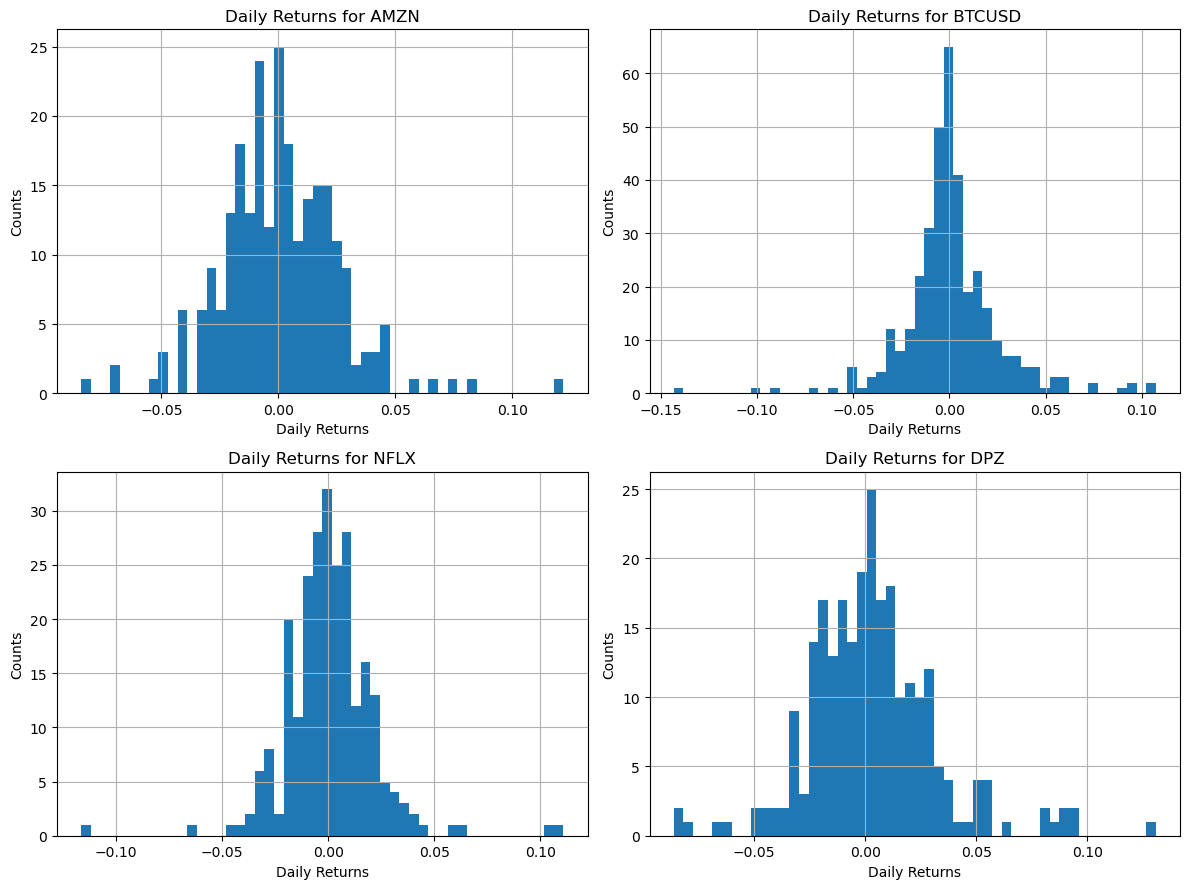

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
for i, stock in enumerate(stocks_list,1):
    plt.subplot(2,2,i)
    stock['Daily Return'].hist(bins = 50)
    plt.xlabel("Daily Returns")
    plt.ylabel("Counts")
    plt.title(f"Daily Returns for {tech_list[i-1]}")

plt.tight_layout()

In [10]:
#Grabbing all closing prices into one  dataframe

closing_df = pd.DataFrame()
closing_df['Date'] = BTCUSD['Date']

for i, stock in enumerate(stocks_list,1):
    closing_df[f'{tech_list[i-1]}'] = stock['Adj Close']


In [11]:
closing_df.dropna()
closing_df.set_index('Date', inplace=True)

In [12]:
tech_rets = closing_df.pct_change()

In [13]:
tech_rets.head(10)

,AMZN,BTCUSD,NFLX,DPZ
Date,,,,
2022-09-02,NaN,NaN,NaN,NaN
2022-09-03,-0.010980,-0.006895,-0.008283,-0.034143
2022-09-04,0.026723,0.007797,-0.000441,0.048400
2022-09-05,0.002626,-0.008723,-0.001682,-0.006639
2022-09-06,0.026575,-0.049197,0.014144,0.026952
2022-09-07,0.023861,0.024029,-0.007300,0.012673
2022-09-08,-0.070575,0.002048,-0.038580,-0.077791
2022-09-09,0.013641,0.106122,-0.025767,0.027461
2022-09-10,-0.017659,0.014002,0.027125,0.050241


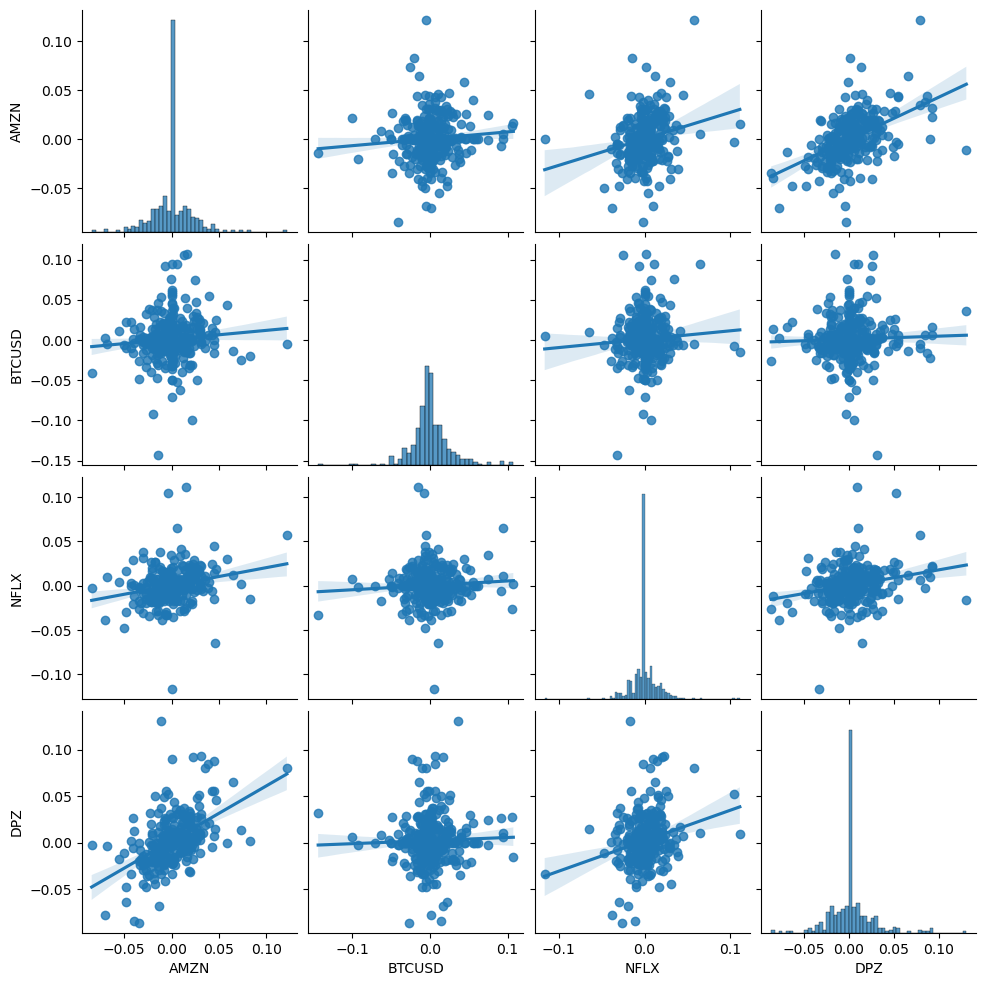

In [14]:
import seaborn as sns
sns.pairplot(tech_rets,kind = 'reg' )

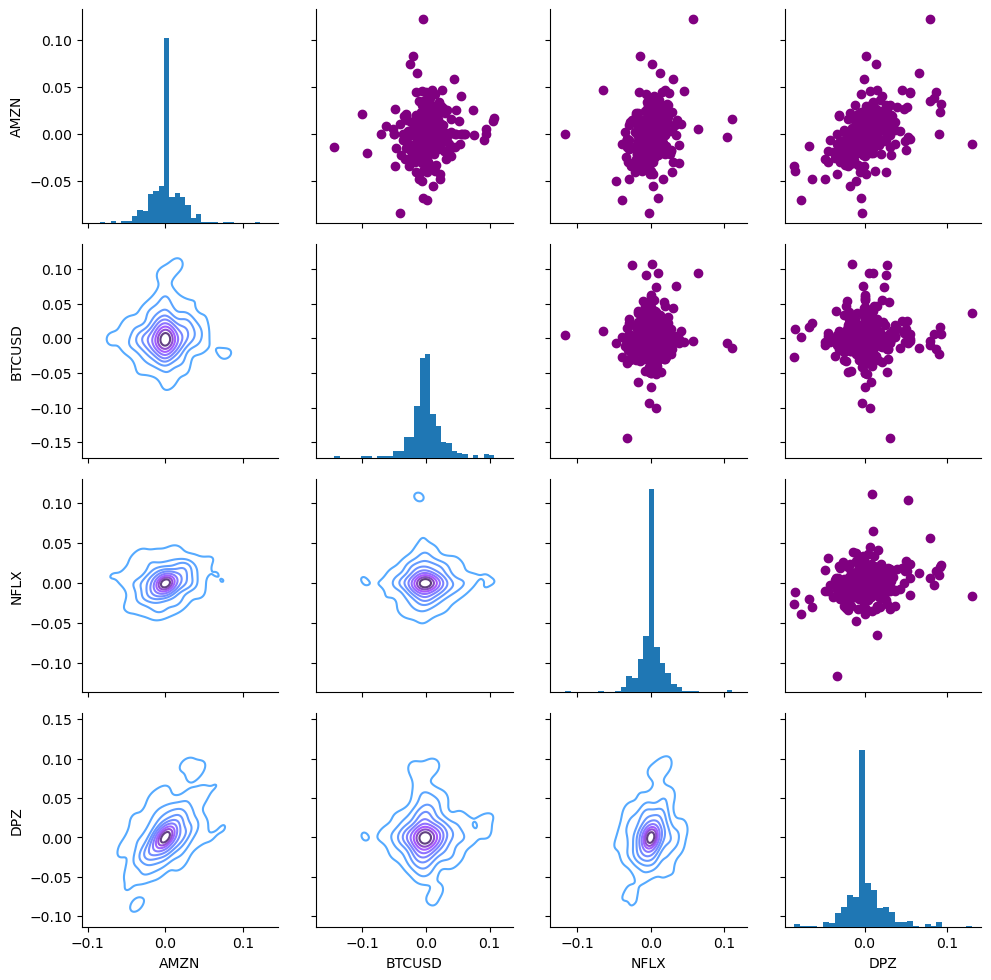

In [15]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter,color = 'purple')

return_fig.map_lower(sns.kdeplot,cmap = 'cool_d')
return_fig.map_diag(plt.hist, bins = 30)

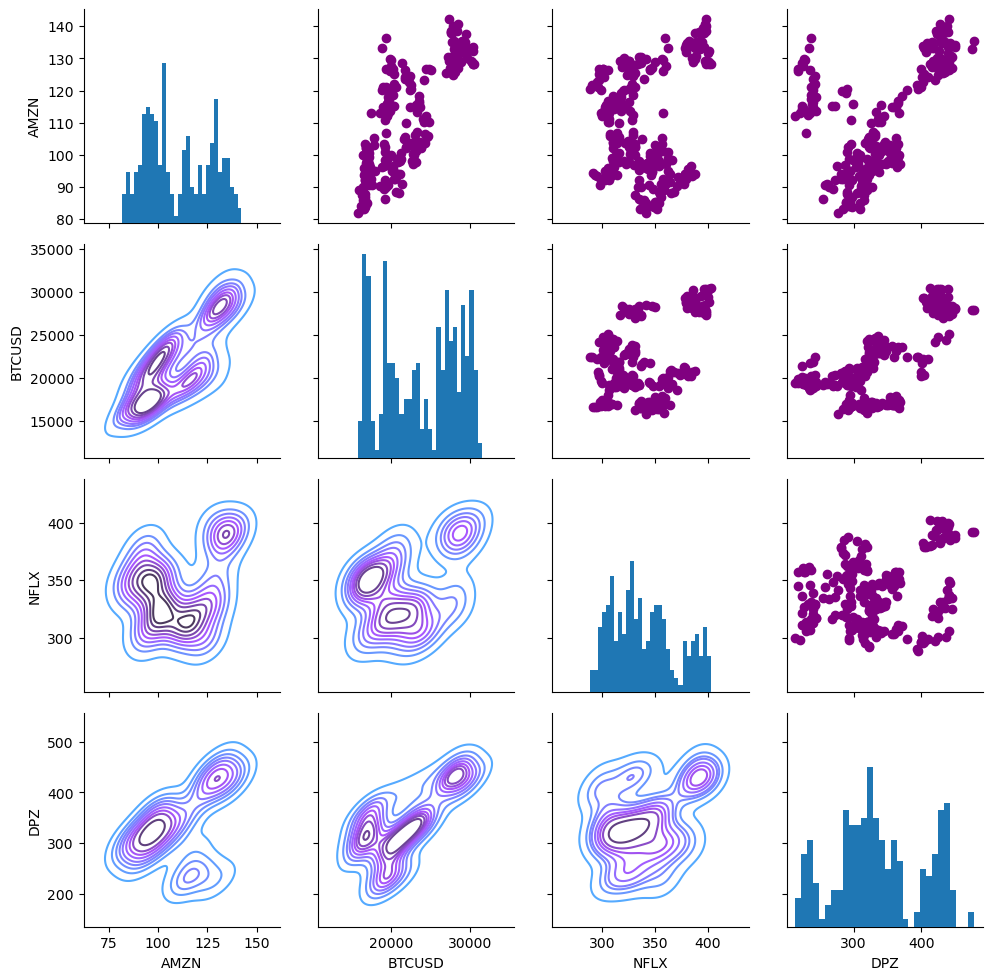

In [16]:
return_fig = sns.PairGrid(closing_df)
return_fig.map_upper(plt.scatter,color = 'purple')

return_fig.map_lower(sns.kdeplot,cmap = 'cool_d')
return_fig.map_diag(plt.hist, bins = 30)

Text(0.5, 1.0, 'Correlation of Closing prices ')

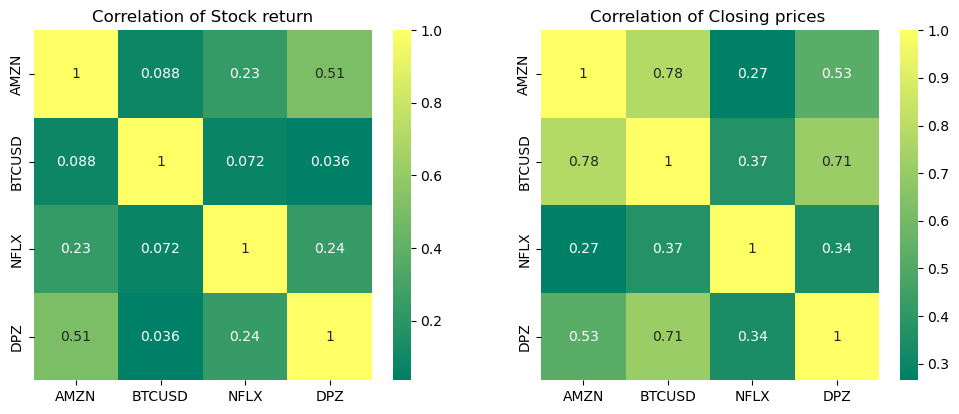

In [17]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot=True, cmap = 'summer')
plt.title("Correlation of Stock return")

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(), annot=True, cmap = 'summer')
plt.title("Correlation of Closing prices ")

In [18]:
for stock in stocks_list:
    stock.set_index('Date', inplace=True)


In [19]:
df.set_index(pd.to_datetime(df['Date']), inplace=True)

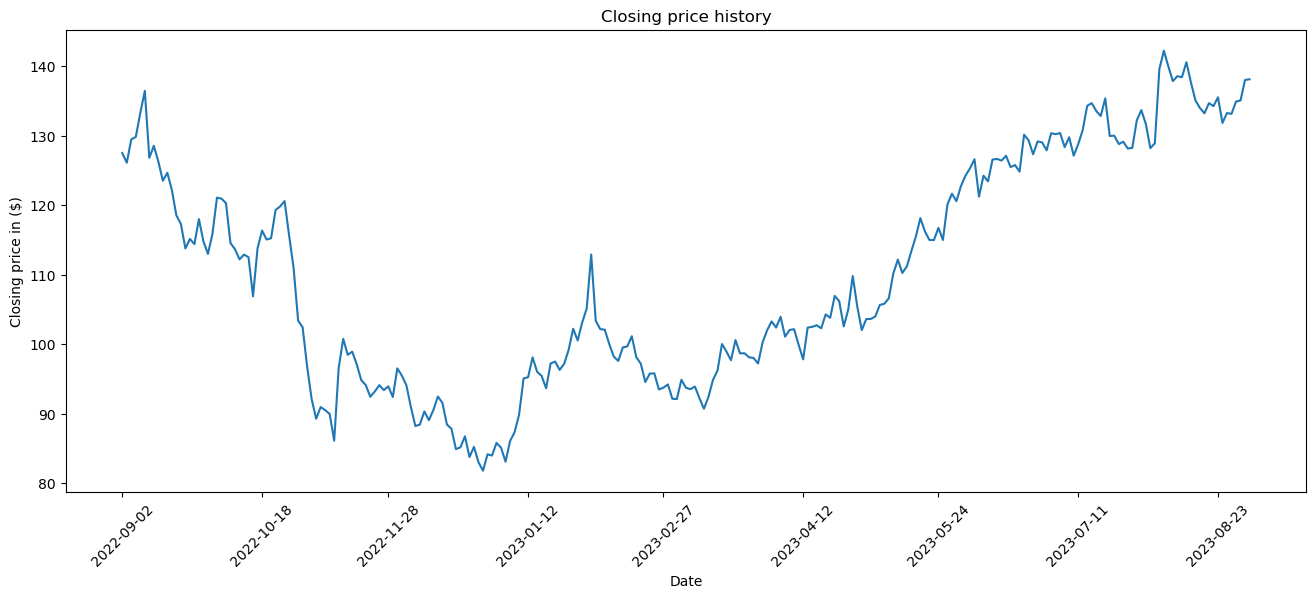

In [33]:
df  = pd.DataFrame(AMZN)
from matplotlib.dates import MonthLocator, DateFormatter
plt.figure(figsize = (16,6))
plt.title('Closing price history')
plt.plot(df['Close'])
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Closing price in ($)')
plt.show()

In [34]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset)* 0.95))

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [36]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.75645697, 0.73327815, 0.78907277, 0.79470209, 0.85182124,
       0.90447013, 0.7450331 , 0.77367553, 0.73609269, 0.69056289,
       0.70927158, 0.66837751, 0.60794703, 0.58758274, 0.52913905,
       0.55182122, 0.53956959, 0.59917221, 0.54602653, 0.51622516,
       0.56390723, 0.65016549, 0.64784762, 0.63708613, 0.54205294,
       0.52731784, 0.50314567, 0.51456956, 0.50844368, 0.41523181,
       0.52930464, 0.57185431, 0.55049668, 0.55347681, 0.62086092,
       0.62913906, 0.64205294, 0.56026496, 0.48245031, 0.35745039,
       0.34139076, 0.24784769, 0.17052985, 0.12384111, 0.15165568,
       0.14420528, 0.13509939, 0.07152316, 0.24519862, 0.31407286,
       0.27599334, 0.28344374, 0.2533113 , 0.21572844, 0.20397349,
       0.17615892, 0.18841054, 0.20380789, 0.19188748, 0.20082776])]
[0.17549665272356552]

[array([0.75645697, 0.73327815, 0.78907277, 0.79470209, 0.85182124,
       0.90447013, 0.7450331 , 0.77367553, 0.73609269, 0.69056289,
       0.70927158, 0.66837751, 0.60

In [39]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = tf.keras.Sequential()
model.add(LSTM(activation= 'tanh',128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(activation= 'tanh',64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


SyntaxError: positional argument follows keyword argument (1252310550.py, line 6)

In [38]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 576ms/step


5.77808707738624

C:\Users\karth\AppData\Local\Temp\ipykernel_17356\3344400724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


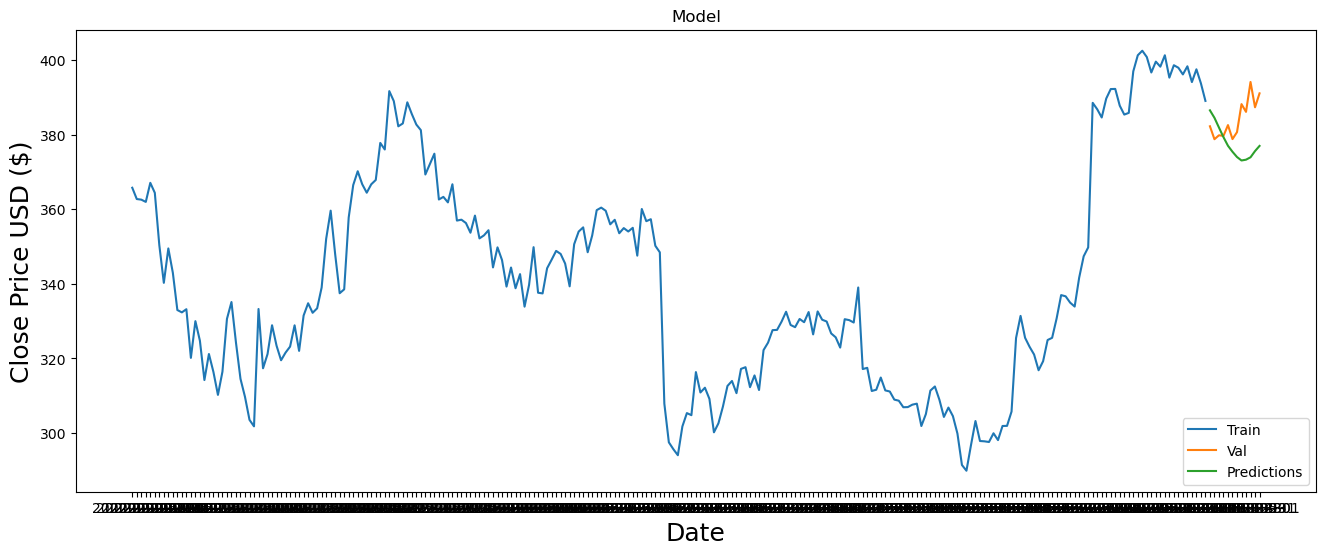

In [28]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()